## 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces=fetch_lfw_people()

In [4]:
faces.keys()

dict_keys(['images', 'target', 'DESCR', 'target_names', 'data'])

In [5]:
faces.data.shape

(13233, 2914)

In [6]:
faces.images.shape

(13233, 62, 47)

In [7]:
def plot_faces(data):
    fig,axes=plt.subplots(6,6,figsize=(10,10), subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47), cmap='bone')
    plt.show()

In [8]:
rand_idxes=np.random.permutation(len(faces.data))

X=faces.data[rand_idxes]

In [9]:
example_faces=X[:36,:]
example_faces.shape

(36, 2914)

In [20]:
faces.target.shape

(13233,)

In [21]:
faces.target[:10]

array([5360, 3434, 3807,   26, 3957,  439, 2683, 3734, 5465, 3445], dtype=int64)

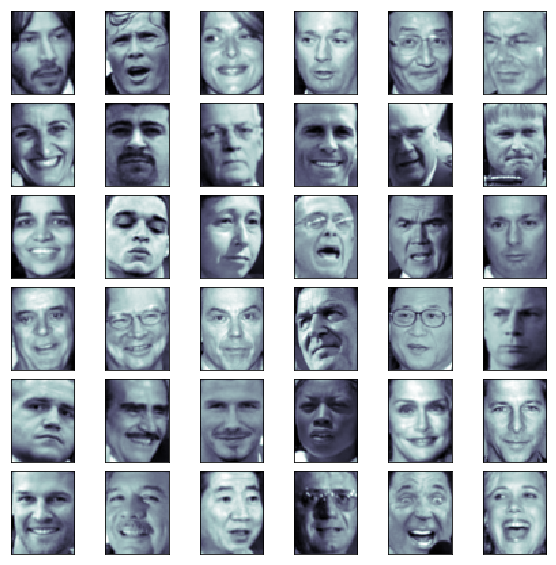

In [10]:
plot_faces(example_faces)

In [11]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], 
      dtype='<U35')

In [12]:
len(faces.target_names)

5749

## 特征脸

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(svd_solver='randomized')

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[ -1.00028974e-02,  -1.07648605e-02,  -1.17448796e-02, ...,
         -5.60940841e-03,  -4.22317500e-03,  -2.95124966e-03],
       [ -1.74751512e-02,  -1.75355102e-02,  -1.80040311e-02, ...,
          2.98296835e-02,   2.74746189e-02,   2.54043737e-02],
       [  3.33131163e-02,   3.48625412e-02,   3.74312467e-02, ...,
          2.00045733e-02,   1.93067907e-02,   1.82113633e-02],
       ..., 
       [  4.41743862e-04,   8.52308783e-04,  -2.55679699e-03, ...,
         -1.43122037e-03,   4.68717436e-04,   1.34439261e-05],
       [  2.23875631e-04,  -8.56894079e-04,   1.19839649e-03, ...,
         -9.60153823e-04,   5.91213765e-04,  -6.30500344e-04],
       [  8.57959234e-04,  -1.23889591e-03,   1.32401891e-03, ...,
          1.93081313e-03,  -1.11272092e-03,   6.93132460e-04]])

In [17]:
pca.n_components_

2914

In [18]:
pca.components_.shape

(2914, 2914)

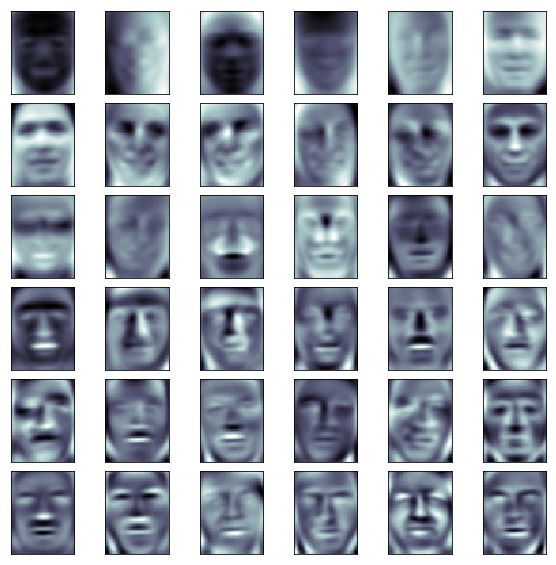

In [19]:
plot_faces(pca.components_[:36,:])

## 更多人脸照片

上述数据，有1万多照片，但是，人有5千多，平均下来，每个人猜2张照片。
两张照片，对于分类，显得不够。

In [22]:
"""
每个人至少60张照片
"""
faces2=fetch_lfw_people(min_faces_per_person=60)

In [23]:
faces2.data.shape

(1348, 2914)

In [26]:
faces2.target.shape

(1348,)

In [25]:
faces2.target_names.shape

(8,)

In [27]:
faces2.target[:10]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X2=faces2.data
y2=faces2.target

X2_train, X2_test, y2_train, y2_test =train_test_split(X2, y2)

In [30]:
X2_train.shape

(1011, 2914)

In [31]:
X2_test.shape

(337, 2914)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X2_train, y2_train)
knn_clf.score(X2_test, y2_test)

0.54599406528189909